<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

##### Notes:
- Normal distribution is defined by 2 parameters:
    - mean and standard deviation
    
- Mean decides the centre's location.
- Standard deviation decides the chubbiness. 
- 68% of the points will lie between the mean and the stdev. 

- The function needed to draw normal random samples is:
    - np.random.normal(loc=, scale=, size=)

- loc is to specify the mean.
- scale is to specify the stdev. 


In [1]:
np.random.normal(loc=5, scale=2, size=10)


array([ 4.92285476,  6.16043213,  5.46425279,  4.71199835,  5.38805388,
        6.37591912,  6.07228073,  9.11372072, 11.06257827,  6.5637015 ])

### 1.2 Visualising the random numbers

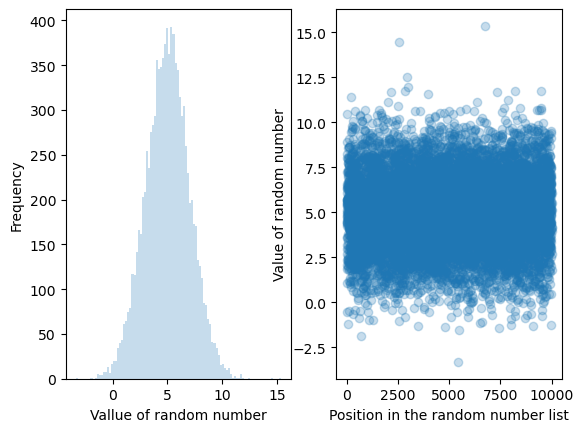

In [5]:
# Visualise the normal distribution numbers here.

from matplotlib import pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel('Vallue of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel('Position in the random number list')
axis.set_ylabel('Value of random number')

plt.show()

### 1.3 68%?

In [8]:
# Check if the normal random numbers given satisfies the 68% condition:

n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')


% of points between 1 std.dev. from the mean: 68.41%


## 1 Brownian Motion in 1D

### 1.1 The scenario

###### Simulate a simple random walk in 1D.

The scenario: 
- A particle is restricted to moving in 1D (just along a line).
- It moves in steps, either one unit to the left or one to the right. 
- The choice of right or left is selected randomly. 
- Take the probability of going right as p, going left as q(=1-p)

### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

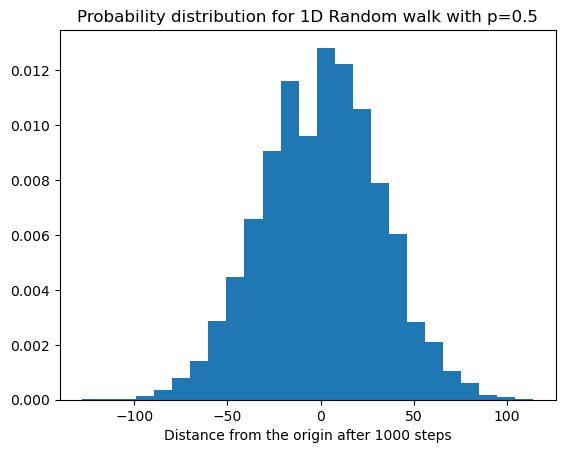

In [12]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    '''
        This function returns the final position of the particle 
        after the number of steps. 
        prob_right is the probability of going right. 
    '''
    step_size = 1
    x = 0               # Starting x position
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right:     # Go right?
            x += step_size
        else:
            x -= step_size
    
    return x

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# Because the probability is 0.5,
# the graph is perfectly symmetrical. 

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

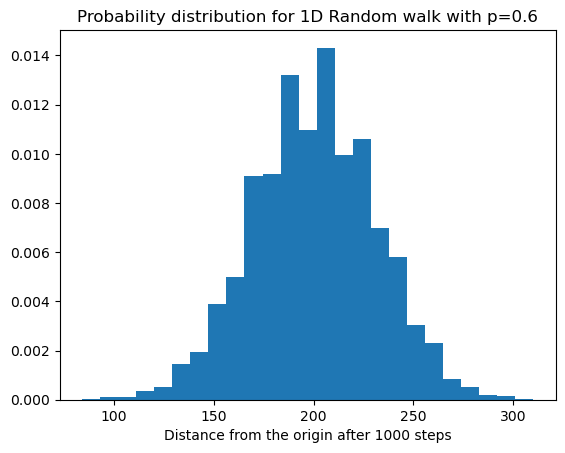

In [33]:
# BUT when the probability is increased to 0.6, 
# the graph shifts rightwards. 

import numpy.random as rnd

def brown_1d(prob_right=.6, no_of_steps=10000):
    '''
        This function returns the final position of the particle 
        after the number of steps. 
        prob_right is the probability of going right. 
    '''
    step_size = 1
    x = 0               # Starting x position
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right:     # Go right?
            x += step_size
        else:
            x -= step_size
    
    return x

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [17]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the 
    Gaussian distribution.
    '''
    
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output


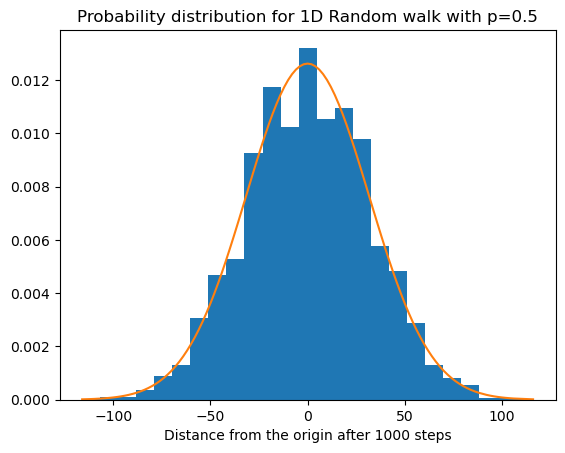

In [40]:
def brown_1d(p=.5, no_of_steps=10000):
    '''
        This function returns the final position of the particle 
        after the number of steps. 
        prob_right is the probability of going right. 
    '''
    step_size = 1
    x = 0               # Starting x position
    
    for _ in range(no_of_steps):
        if rnd.random() < p:     # Go right?
            x += step_size
        else:
            x -= step_size
    
    return x

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(p=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - p                          # q = 1 - p
mean = no_of_steps * (p - prob_left)       # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*p*prob_left)    # sd = sqrt(4 N p q)
x = np.unique(results)                              # Numbers that form
                                                    # the x axis

plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

simulate this experiment by randomly ‘creating’ points (to represent where a grain of sand will land) by using NumPy’s PRNG. We can then decide if this grain of sand is inside or outside to get Ngreen and then go on to get an estimate for π.

### 2.2 A poor but intuitive solution

In [41]:
N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)
    
    if r <= 1:
        N_green += 1

4 * N_green / N_total

3.13808

### 2.3 A better solution

In [42]:
# This method generates multiple random numbers at once.

N_total = 1_000_000
x = rnd.uniform(low=-1, high=1, size=N_total)
y = rnd.uniform(low=-1, high=1, size=N_total)
N_green = np.sum(x**2+y**2 <= 1)

4 * (N_green / N_total)

3.137724

### 2.4 A smarter solution

In [43]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green = np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141764

## Exercise 1 :  Vital Stats of Random π

In [ ]:



# Your solution here


